### Problem 2.1 To walk “downhill” on the loss function (equation 2.5), we measure its gradient with respect to the parameters ϕ0 and ϕ1. Calculate expressions for the slopes ∂L/∂ϕ0 and ∂L/∂ϕ1.

$L[\phi] = \sum\limits_i^I (\phi_0 + \phi_1 * x_i - y_i)^2$

$\frac{\partial L}{\partial \phi_0} = \sum\limits_i^I 2(\phi_0 + \phi_1 * x_i - y_i)$

$\frac{\partial L}{\partial \phi_1} = \sum\limits_i^I 2(\phi_0 + \phi_1 * x_i - y_i)*x_i$

### Problem 2.2 Show that we can find the minimum of the loss function in closed form by setting the expression for the derivatives from problem 2.1 to zero and solving for ϕ0 and ϕ1. Note that this works for linear regression but not for more complex models; this is why we use iterative model fitting methods like gradient descent (figure 2.4).

1. $\frac{\partial L}{\partial \phi_0} = \sum\limits_i^I 2(\phi_0 + \phi_1 * x_i - y_i) = 0$ 
2. $\frac{\partial L}{\partial \phi_1} = \sum\limits_i^I 2(\phi_0 + \phi_1 * x_i - y_i)*x_i = 0$ 

From (1.)

$\sum\limits_i^I (\phi_0 + \phi_1 * x_i - y_i) = 0$

$\phi_0 * I + \phi_1 * \sum\limits_i^I x_i =  \sum\limits_i^I y_i$

3. $\phi_0 + \phi_1 * \overline{x} =  \overline{y}$

From (2.)

$\sum\limits_i^I (\phi_0 + \phi_1 * x_i - y_i)*x_i = 0$

$\phi_0 * \sum\limits_i^I x_i + \phi_1 * \sum\limits_i^I x_i^2 =  \sum\limits_i^I x_i *y_i$

4. $\phi_0 \overline{x} + \phi_1 * \overline{x^2} =  \overline{xy}$

Multiply (3.) by $-\overline{x}$ and add to (4.)

$\phi_1 * (\overline{x^2} - \overline{x}^2) = (\overline{xy} - \overline{x}\overline{y})$

$\phi_1 = \frac{Cov(x, y)}{Var(x)}$

$\phi_0 = \overline{y} - \frac{Cov(x, y)}{Var(x)} \overline{x}$







### Problem 2.3∗ Consider reformulating linear regression as a generative model, so we have x = g[y, ϕ] = ϕ0 + ϕ1y. What is the new loss function? Find an expression for the inverse function y = g−1[x, ϕ] that we would use to perform inference. Will this model make the same predictions as the discriminative version for a given training dataset {xi, yi}? One way to establish this is to write code that fits a line to three data points using both methods and see if the result is the same.

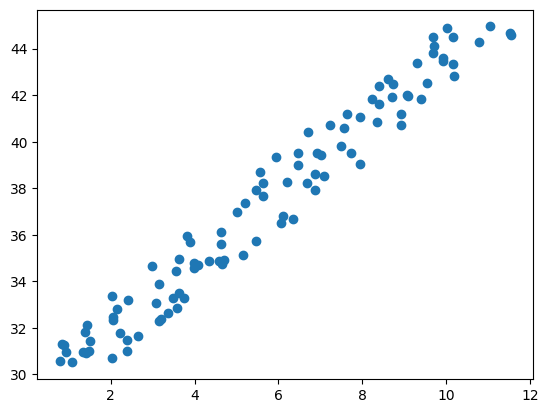

In [11]:
# New loss is L[phi] = sum(phi_0 + phi_1y_i - x_i). I.e. we minimize the horizontal distance between the points and the line instead of the vertical distance.
# This is essentially the inverse problem and presumes the measurement error is in the input space instead of the output space. That is, instead of 
# y_i = phi_0 + phi_1 * x_i + eps_i
# We think 
# y_i = phi_0 + phi_1 * (x_i + eps_i)
#
# The model will make different predicitons in this situation. 

import numpy as np
import matplotlib.pyplot as plt

# Generate data
seed = 42
eps_in = 1  # size of noise in inputs
eps_out = .5  # size of noise in outputs
size = 100
rs = np.random.RandomState(seed)

xmax = 10
x_true = xmax * rs.random(size)
x = x_true + 2*eps_in*rs.random(size) # input measurement error

b0, b1 = 30, 1.5
y_true = b0 + b1 * x_true
y = y_true + eps*rs.random(size) # output measurement error

plt.scatter(x, y)




